<!-- <a href="https://colab.research.google.com/github/lphansen/RiskUncertaintyValue/blob/main/discrete_elasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> -->

# Notebook: Discrete Time

Shock elasticities quantify the (local) exposures of macroeconomic cash flows to shocks over alternative investment horizons and the corresponding prices or investors’ compensations. Here we cover shock elasticities for models that are exponential-quadratic. This model structure is particularly tractable with quasi-analytical solutions.    
- Section 1 introduces the exponential–quadratic framework. 
- Section 2 provides an illustration using a long-run risk model.
- Section 3 provides more details on the computation.
  
This notebook provides both written explanations and accompanying code. Please refer to the following papers for further details:

["Term Structure of Uncertainty in the Macroeconomy” joint research with Jaroslav Borovička – Handbook of Macroeconomics](https://larspeterhansen.org/wp-content/uploads/2016/10/macroterm_main.pdf) 

["Examining Macroeconomic Models Through the Lens of Asset Pricing” joint research with Jaroslav Borovička – Journal of Econometrics](https://larspeterhansen.org/wp-content/uploads/2016/10/Examining-Macroeconomic-Models-through-the-Lens-of-Asset-Pricing.pdf) 

["Shock elasticities and impulse responses" joint research with Jaroslav Borovička and José A. Scheinkman - Mathematics and Financial Economics](https://link.springer.com/article/10.1007/s11579-014-0122-4)



# 1. Exponential-linear-quadratic Framework

We suppose a linear-quadratic specification of the state dynamics:

$$
\begin{align}
X_{t}^0&= \bar{x} \notag \\
X_{t+1}^1&=\Theta_{10}^x+\Theta_{11}^x X_{t}^1+\Sigma_{10}^x W_{t+1} \tag{1} \\
X_{t+1}^2&= \Theta_{20}^x+\Theta_{21}^x X_{t}^1+\Theta_{22}^xX_{t}^2+\Theta_{23}^x\left(X_{t}^1 \otimes X_{t}^1\right) \\ 
&+\Sigma_{20}^x W_{t+1}+\Sigma_{21}^x\left(X_{t}^1 \otimes W_{t+1}\right) +\Sigma_{22}^x\left(W_{t+1} \otimes W_{t+1}\right) \notag .
\end{align} 
$$

The code will take the coefficients as inputs. 

Furthermore, we suppose that the logarithms of macroeconomic and stochastic discount factor processes that interest us grow or decay stochastically over time with stationary increments.  Let $Y$ be the logarithm of such a process. The process $Y$ will display linear growth or decay:

$$
\begin{align*}
Y_{t+1} - Y_t &= \Theta_0^y + \Theta_{1}^y X_{1,t} + \Theta_{2}^y X_{2,t} + \left( X_{1,t} \right)' \Theta_{3}^y X_{1,t} \\
&+ \Sigma_0^y W_{t+1} + \left(X_{1,t} \right)' \Sigma_1^y W_{t+1} + \left( W_{t+1} \right)' \Sigma_2^y W_{t+1}  \tag{2}
\end{align*}
$$

Following the steps of our approximation of $X$, we write 

$$
\begin{aligned} 
\Theta_0^y &=  \kappa\left({\bar x},0,0 \right) & \Sigma_0^y &=  \kappa_2  \\
\Theta_1^y &=  \kappa_1 & \Sigma_1^y &=  \kappa_{12} \\
\Theta_2^y &=  \kappa_{1} & \Sigma_2^y &=  \frac 1 2 \kappa_{22} \\ 
\Theta_3^y &=   \frac 1 2 \kappa_{1,1}  &  &
\end{aligned}
$$ 

where $\kappa_i$ is the derivative of $\kappa$ with respect to argument $i$ evaluated at $(\bar x, 0, 0)$ and similarly for the second derivatives.   

In what follows, $M$ will be a macro growth process, a stochastic discount factor process, or a product of the two. The user inputs are the quadratic specifications in equation (1) and equation (2).  

We consider two types of multiplicative processes,  one that captures macroeconomic growth, denoted by $G$, and another that captures stochastic discounting, denoted by $S$. 
- The stochastic discount factor process,  $S$, is typically computed from the underlying economic model to reflect equilibrium valuation dynamics. 
- For instance, the growth process $G$ might be a consumption process or some other endogenously determined cash flow, or it might be an exogenously specified technology shock process that grows through time.  
- The interplay between $S$ and $G$ will determine uncertainty compensations over multi-period investment horizons.

Consider the pricing of a vector of payoffs $G_tW_1$ in comparison to the scalar payoff $G_t$. 
<!-- - The **shock-exposure elasticity** is constructed as from the ratio of expected payoffs $E[G_tW_1 |X_0 =x]$ relative to $E [G_t | X_0 = x]$. -->
- The **shock-exposure elasticity** is constructed as from the ratio of expected payoffs $E[G_tW_1 |X_0 =x]$ relative to $E [G_t | X_0 = x]$. To calculate shock-exposure elasticity, the multiplicative functional $M$ is set as $G$.

    $$
    \varepsilon_{g}( x, t)=   \frac{(\alpha_0 + \alpha_1 x) \cdot {\mathbb E}\left[\left( \frac {G_t}{G_0}\right) W_1 \mid X_0 = x\right]}{{\mathbb E} \left(\frac {G_t}{G_0}  \mid X_0 = x\right)}
    $$

 - This is done by the function *\_exposure\_elasticity*.
- The **shock-price elasticity** includes an adjustment for the values of the payoffs $E [S_t G_t W_1 | X_0 = x]$ relative to $E [S_t G_t | X_0 = x]$. To calculate shock-price elasticity, the multiplicative functional $M$ is set as the product $SG$. 

$$
\varepsilon_{sg}( x, t)=   \frac{(\alpha_0 + \alpha_1 x) \cdot {\mathbb E}\left[\left( \frac {S_tG_t}{S_0G_0}\right) W_1 \mid X_0 = x\right]}{{\mathbb E} \left(\frac {S_tG_t}{S_0G_0}  \mid X_0 = x\right)}.
$$ 

The shock-price elasticity is: 

$$
\varepsilon_{g}( x, t)-\varepsilon_{sg}( x, t)
$$

 - This computation is done by the function *price\_elasticity*. 

# 2. An Illustration using the Long-Run Risk Model




We will now cover how to use the code on a basic level. You can see the package requirements [here](../../requirements.txt).

In [11]:
import os
import sys
workdir = os.getcwd()
!git clone https://github.com/lphansen/RiskUncertaintyValue 
workdir = os.getcwd() + '/RiskUncertaintyValue'             
sys.path.insert(0, workdir+'/src')
from IPython.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))
import numpy as np
np.set_printoptions(suppress=True)
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from numba import njit, prange
import seaborn as sns

from lin_quad import LinQuadVar
from lin_quad_util import next_period, log_E_exp, kron_prod, distance
from utilities import mat, vec, sym
from elasticity import exposure_elasticity, price_elasticity


fatal: destination path 'RiskUncertaintyValue' already exists and is not an empty directory.


We use the long-run risk model adapted from {cite}`HansenKhorramiTourre:2024` as an example; the model is outlined in {ref}`section:solvingplanner`. In a later lecture, you will learn how to solve such models using expansion methods. For now, suppose that we have solved the model and have the following linear-quadratic approximations for the states $X_t = [X_{1,t},X_{2,t}]$ and consumption growth ${\widehat C}_{t+1} - {\widehat C}_t$:

First-order approximation:

$$
\begin{aligned}
X_{1, t+1}^1 & = .9 X_{1,t}^1  +  \begin{bmatrix} 0 & .06 & 0 \end{bmatrix} W_{t+1}   \cr
X_{2, t+1}^1 & =  .8X_{2,t}^1  + \begin{bmatrix} 0 & 0 & .5 \end{bmatrix} W_{t+1} \cr
\log C_{t+1}^1 - \log C_t ^1& = .01 + .03 X_{1,t}^1 +   \begin{bmatrix} .008 & .01 & 0 \end{bmatrix} W_{t+1}. 
\end{aligned}
$$

Second-order approximation:

$$
\begin{aligned}
X_{1, t+1}^2 & = .9 X_{1,t}^2  +   X_{2,t}^1 \begin{bmatrix} 0 & .06 & 0 \end{bmatrix} W_{t+1}   \cr
\log C_{t+1}^2 - \log C_t^2 & =  .01 X_{1,t}^2 +   X_{2,t}^1 \begin{bmatrix} .008 & .01 & 0 \end{bmatrix} W_{t+1}. 
\end{aligned}, 
$$ 


Note that the superscript refers to the approximation order and the subscript refers to the state. We store the approximations in objects of class `LinQuadVar`. For example, we can form the approximations described above as follows:

In [2]:
n_X = 2 #Two states
n_W = 3 #Three shocks

# State approximation where first row is X_1 and second row is X_2
X1_tp1 = LinQuadVar({'x': np.array([[0.9, 0.   ],     
                                    [0.   , 0.8]]),
                     'w': np.array([[0., 0.06, 0.       ], 
                                    [0., 0.    , 0.5]])},
                             shape=(2, n_X, n_W))

X2_tp1 = LinQuadVar({'x2': np.array([[0.9, 0.   ],
                                     [0.   , 0.]]),
                     'xw': np.array([[0., 0., 0., 0., 0.06,  0.      ],
                                     [0., 0., 0., 0., 0.    , 0.]])},
                             shape=(2, n_X, n_W))

### Log consumption growth
gc_tp1 = LinQuadVar({'c': np.array([[0.01]]),
                     'x': np.array([[0.03, 0.]]),
                     'w': np.array([[0.008, 0.01, 0.]]),
                     'x2': np.array([[0.01, 0.]]),
                     'xw': np.array([[0., 0., 0., 0.004, 0.01, 0.]])
                     }, shape=(1, n_X, n_W))


Next, we input these approximations into the `exposure_elasticity` function to compute exposure elasticities.

## 2.1 Exposure Elasticity for Consumption Growth

To calculate the exposure elasticity for consumption growth using the *exposure\_elasticity* defined above, we need six inputs
- Consumption growth, *gc\_tp1*. This is a *LinQuadVar* object. 
- First order expansion of the state evolution equations, *X1\_tp1*. This is a *LinQuadVar* object. 
- Second order expansion of the state evolution equations, *X2\_tp1*. This is a *LinQuadVar* object. 
- Time periods, $\text{T} = 30$ years
- Shock index, $0$ stands for the growth shock, which means $\alpha' =\begin{bmatrix}1 & 0 & 0 \end{bmatrix}$, $1$ stands for the volatility shock, $2$ stands for the consumption shock.  The fourth shock alters dividend growth and its shock prices are zero.  
- Percentile, $0.5$ stands for the median

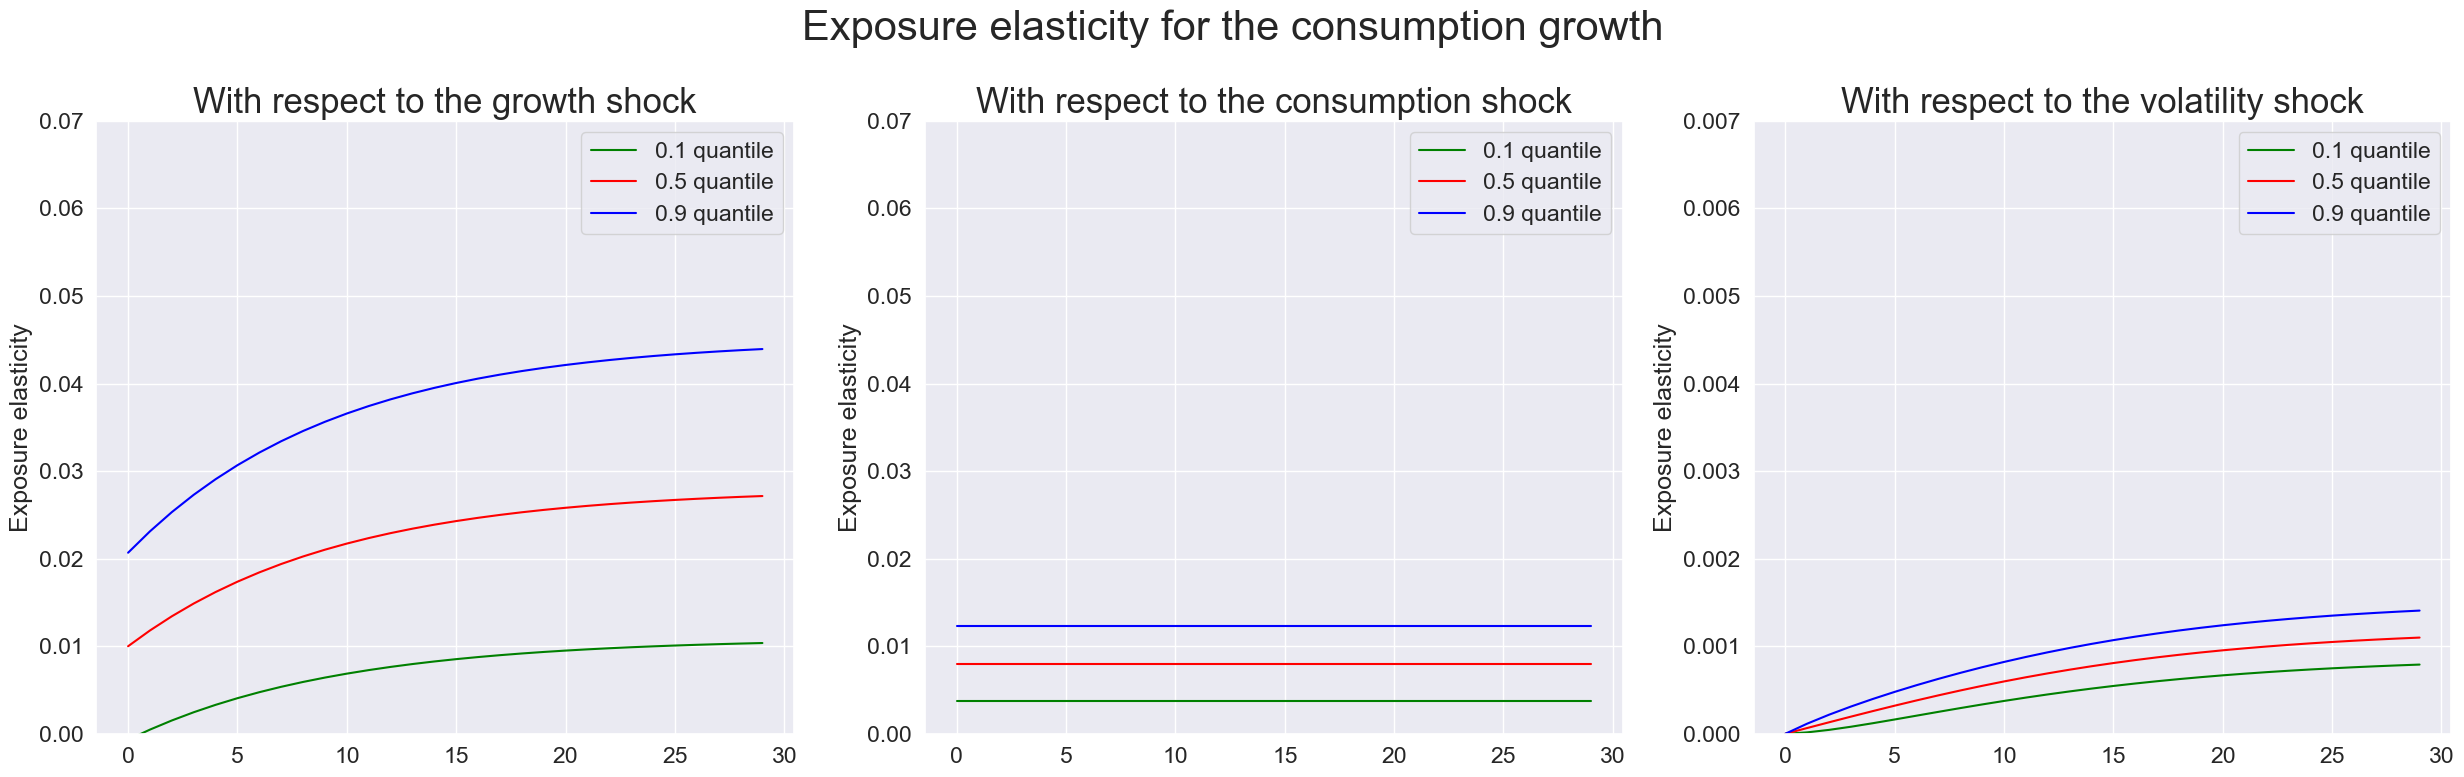

In [14]:
## Calculate exposure elasticity for consumption growth
quantile = [0.1, 0.5, 0.9]
T = 30

expo_elas_shock_0_015 = [exposure_elasticity(gc_tp1, X1_tp1, X2_tp1, T, shock=0, percentile=p) for p in quantile] # The first shock is the growth shock
expo_elas_shock_1_015 = [exposure_elasticity(gc_tp1, X1_tp1, X2_tp1, T, shock=1, percentile=p) for p in quantile] # The second shock is the volatility shock
expo_elas_shock_2_015 = [exposure_elasticity(gc_tp1, X1_tp1, X2_tp1, T, shock=2, percentile=p) for p in quantile] # The third shock is the consumption shock

## Plot the exposure elasticity for consumption growth
index = ['T','0.1 quantile','0.5 quantile','0.9 quantile']
fig, axes = plt.subplots(1,3, figsize = (25,8))
expo_elas_shock_0 = pd.DataFrame([np.arange(T),expo_elas_shock_0_015[0].flatten(),expo_elas_shock_0_015[1].flatten(),expo_elas_shock_0_015[2].flatten()], index = index).T
expo_elas_shock_1 = pd.DataFrame([np.arange(T),expo_elas_shock_1_015[0].flatten(),expo_elas_shock_1_015[1].flatten(),expo_elas_shock_1_015[2].flatten()], index = index).T
expo_elas_shock_2 = pd.DataFrame([np.arange(T),expo_elas_shock_2_015[0].flatten(),expo_elas_shock_2_015[1].flatten(),expo_elas_shock_2_015[2].flatten()], index = index).T

n_qt = len(quantile)
plot_elas = [expo_elas_shock_1,expo_elas_shock_0, expo_elas_shock_2] # For illustration purpose, the consumption shock is plotted in the second column, the volatility shock is plotted in the third column
shock_name = ['growth shock', 'consumption shock', 'volatility shock']
qt = ['0.1 quantile','0.5 quantile','0.9 quantile']
colors = ['green','red','blue']

for i in range(len(plot_elas)):
    for j in range(n_qt):
        sns.lineplot(data = plot_elas[i],  x = 'T', y = qt[j], ax=axes[i], color = colors[j], label = qt[j])
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Exposure elasticity')
        axes[i].set_title('With respect to the ' + shock_name[i], fontsize=25)
axes[2].set_ylim([0,0.007])
axes[1].set_ylim([0,0.07])
axes[0].set_ylim([0,0.07])
fig.suptitle('Exposure elasticity for the consumption growth', fontsize=30)
fig.tight_layout()
plt.show()

## 2.2 Calculate Price Elasticity for Consumption Growth

Similarly, to calculate the price elasticity for consumption growth using the *price\_elasticity* defined above, we need to input an approximation for the log stochastic discount factor. In the simple case that you will encounter in your problem set, you will be able to deduce this from the consumption growth equation. For now we will presume that we already have the approximation ready:

In [6]:
log_SDF = LinQuadVar({'c' : np.array([[-0.02005034]]),
                      'x' : np.array([[-0.0299976,  -0.02903654]]),
                      'xw': np.array([[ 0.        ,  0.00001026,  0.        , -0.03199734, -0.12719014,  0.        ]]),
                      'xx': np.array([[ 0.0000006 ,  0.        ,  0.0000006 , -0.00725869]]),
                      'w' : np.array([[-0.06399468, -0.24439539,  0.06087257]])}
                      ,shape=(1,n_X,n_W))

Next, we compute price elasticities for the three shocks using the function `price_elasticity`:

In [7]:
quantile = [0.1, 0.5, 0.9]
price_elas_shock_0 = [price_elasticity(gc_tp1, log_SDF, X1_tp1, X2_tp1, T, shock=0, percentile=p) for p in quantile]
price_elas_shock_1 = [price_elasticity(gc_tp1, log_SDF, X1_tp1, X2_tp1, T, shock=1, percentile=p) for p in quantile]
price_elas_shock_2 = [price_elasticity(gc_tp1, log_SDF, X1_tp1, X2_tp1, T, shock=2, percentile=p) for p in quantile]

We can then plot our results:

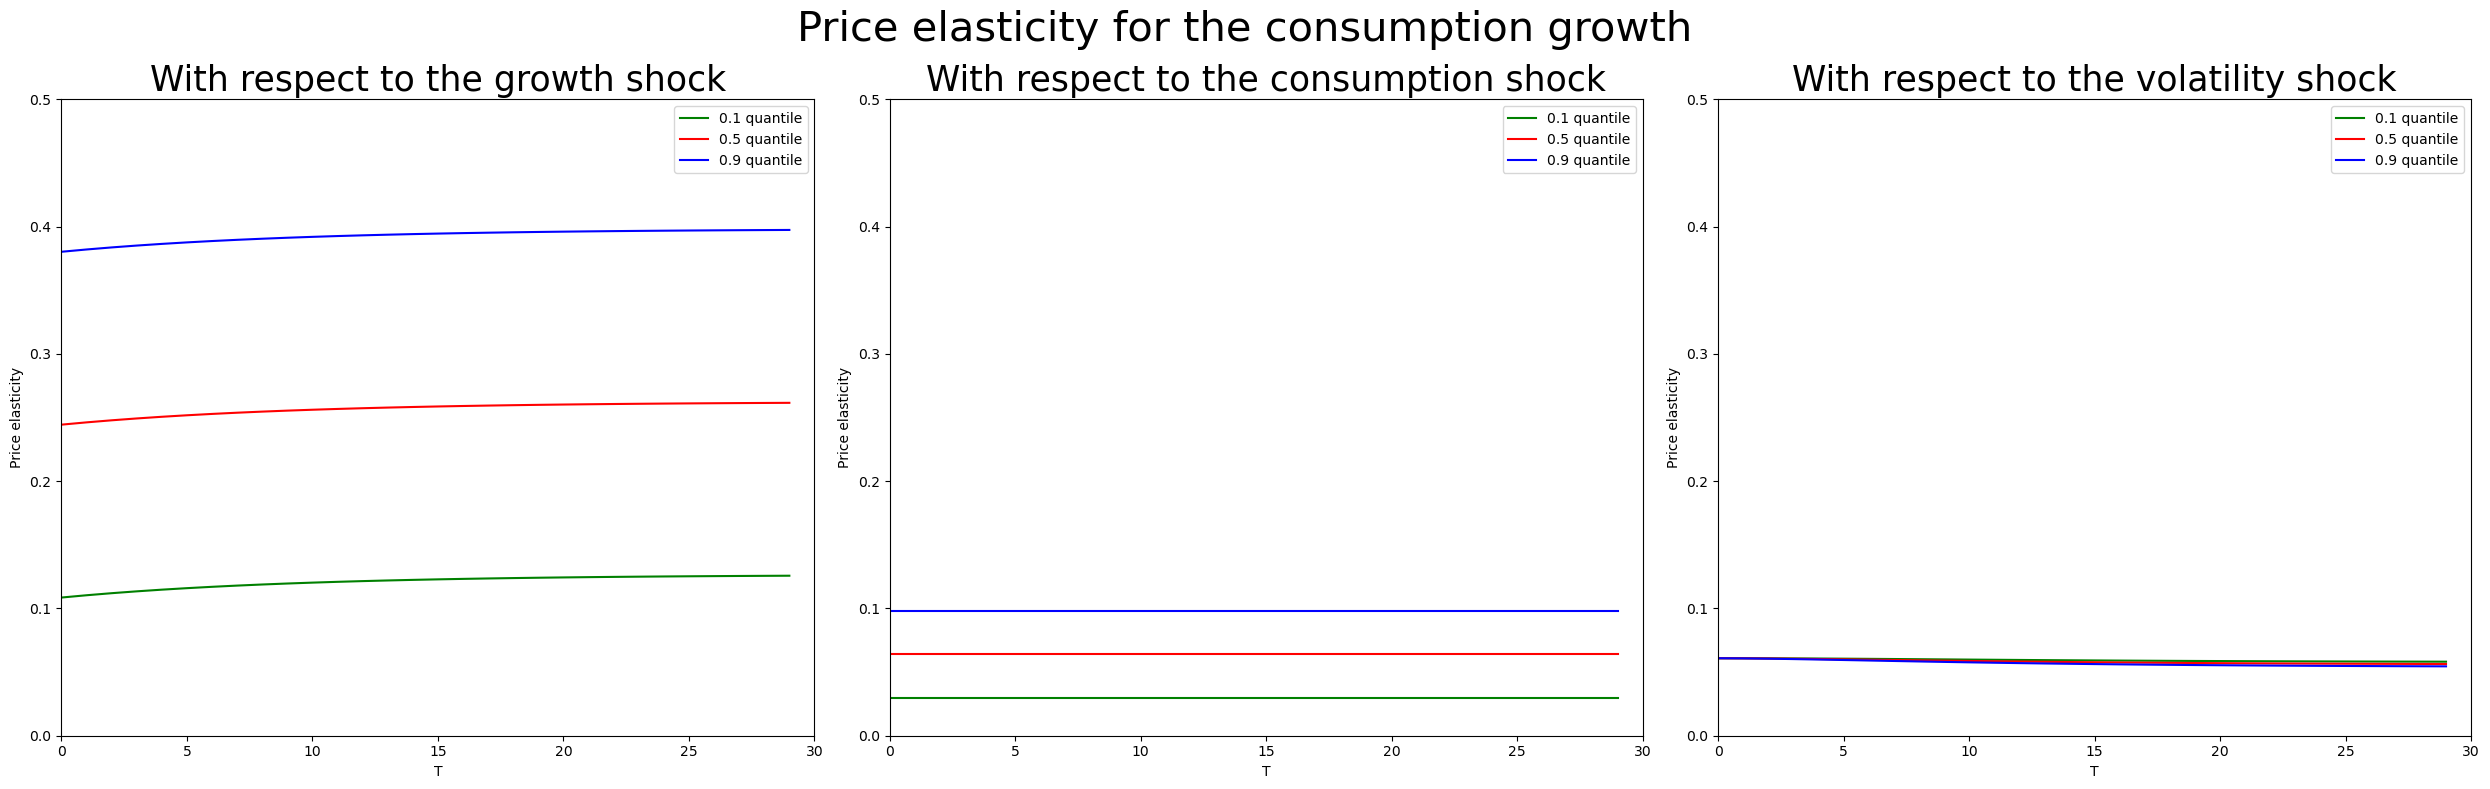

In [8]:
## Plot the price elasticity for consumption growth for only ρ = 2/3 (rho 006)
fig, axes = plt.subplots(1, 3, figsize=(25, 8))  # 1 row, 3 columns for each shock

# Create DataFrames for each shock type with quantiles at ρ = 2/3
price_elas_shock_0_df = pd.DataFrame({
    'T': np.arange(T),
    '0.1 quantile': price_elas_shock_0[0].flatten(),
    '0.5 quantile': price_elas_shock_0[1].flatten(),
    '0.9 quantile': price_elas_shock_0[2].flatten()
})

price_elas_shock_1_df = pd.DataFrame({
    'T': np.arange(T),
    '0.1 quantile': price_elas_shock_1[0].flatten(),
    '0.5 quantile': price_elas_shock_1[1].flatten(),
    '0.9 quantile': price_elas_shock_1[2].flatten()
})

price_elas_shock_2_df = pd.DataFrame({
    'T': np.arange(T),
    '0.1 quantile': -price_elas_shock_2[0].flatten(),
    '0.5 quantile': -price_elas_shock_2[1].flatten(),
    '0.9 quantile': -price_elas_shock_2[2].flatten()
})

# List of data and names for each shock
plot_elas = [price_elas_shock_1_df, price_elas_shock_0_df,price_elas_shock_2_df]
shock_name = ['growth shock', 'consumption shock', 'volatility shock']
quantiles = ['0.1 quantile', '0.5 quantile', '0.9 quantile']
colors = ['green', 'red', 'blue']

# Loop over each shock to plot on its respective axis
for k, ax in enumerate(axes):
    for qtl, color in zip(quantiles, colors):
        sns.lineplot(data=plot_elas[k], x='T', y=qtl, ax=ax, color=color, label=qtl)
    ax.set_xlabel('T')
    ax.set_ylabel('Price elasticity')
    ax.set_title(f'With respect to the {shock_name[k]}', fontsize=25)

axes[0].set_ylim([0,0.5])
axes[1].set_ylim([0,0.5])
axes[2].set_ylim([0,0.5])
axes[0].set_xlim([0,30])
axes[1].set_xlim([0,30])
axes[2].set_xlim([0,30])

fig.suptitle('Price elasticity for the consumption growth', fontsize=30)
fig.tight_layout()
plt.show()


## 2.3 Additional Features
In general, you will not have to input the approximations of the state and consumption growth variables manually. Instead, these will be the outputs of our solution code. We have included some sample solutions of the long-run risk model with different parameters of $\rho$ below. 

In [36]:
import pickle
pd.options.display.float_format = '{:.3g}'.format
sns.set(font_scale = 1.5)

"""
load the long-run risk model solutions when ρ = 2/3, 1, 1.5, 10
"""

with open(workdir + '/data/res_006.pkl', 'rb') as f:
    res_006 = pickle.load(f)
with open(workdir + '/data/res_010.pkl', 'rb') as f:
    res_010 = pickle.load(f)
with open(workdir + '/data/res_015.pkl', 'rb') as f:
    res_015 = pickle.load(f)
with open(workdir + '/data/res_100.pkl', 'rb') as f:
    res_100 = pickle.load(f)


Then we can access the approximations without inputting them manually, for example:

Below is a brief UI to select parameters shown in the long-run risk model. The stochastic volatility process has been normalized with its mean equal to 1. By changing the inputs of parameters, we can see how shock elasticities vary with respect to these parameters.

In [13]:
from ipywidgets import interact
from BY_example_sol import solve_BY_elas

interact(solve_BY_elas, γ=[('5',5), ('10',10),('15',15),('20',20)],\
                        β=[('0.995',0.995),('0.998',0.998), ('0.999',0.999)],\
                        ρ=[('2/3', 2./3),('1', 1.0001),('1.5', 1.5),('10', 10)],\
                        α=[('0.969',0.969),('0.979',0.979),('0.989',0.989)],\
                        ϕ_e=[('0.0002',0.0002),('0.0003432',0.0003432),('0.0004',0.0004)],\
                        ν_1=[('0.977',0.977),('0.987',0.987),('0.997',0.997)],\
                        σ_w=[('0.03',0.03),('0.0378',0.0378),('0.04',0.04)],\
                        μ=[('0.0005', 0.0005),('0.0015', 0.0015),('0.003',0.003)],\
                        ϕ_c=[('0.002',0.002),('0.0078',0.0078),('0.01',0.01)]);

interactive(children=(Dropdown(description='γ', index=1, options=(('5', 5), ('10', 10), ('15', 15), ('20', 20)…

<br>
<br>



# 3. Shock Elasticity Appendix
## 3.1 Analytical framework
Shock elasticities are used to quantify the date $t$ impact on values of exposure to the shock $
(\alpha_0 + \alpha_1 X_0) \cdot W_1$ at date one. It has the form shown in equation 3: 

$$
\varepsilon( x, t)=   \frac{(\alpha_0 + \alpha_1 x) \cdot {\mathbb E}\left[\left( \frac {M_t}{M_0}\right) W_1 \mid X_0 = x\right]}{{\mathbb E} \left(\frac {M_t}{M_0}  \mid X_0 = x\right)}\tag{3}
$$

Using the linear-quadratic dynamics of section 1, the computer software recursively computes the logarithm of the denominator of formula (3):  

$$
\log {\mathbb E}\left(\frac {M_t}{M_1}  \mid X_1 =x\right) = \Phi_{0, t}^*+\Phi_{1, t}^* x_1 +\Phi_{2, t}^*x_2 +
{\frac 1 2} (x_1)' \Phi_{3, t}^*x_1 \tag{4}
$$

Form 

$$
\begin{align*}
&{\mathbb M} \left[ \Phi_{0} +\Phi_1 x_1+\Phi_2 x_2 + {\frac 1 2} (x_1)'\Phi_3 x_1\right] \\ &\equiv
\log {\mathbb E} \left[\left( \frac {M_2}{M_1}\right)\exp\left[\Phi_{0} +\Phi_1 x_1+\Phi_2 x_2 + {\frac 1 2} (x_1)'\Phi_3 x_1\right] \mid X_0 = x \right]  
\end{align*}
$$ 

Conveniently, we can express the outcomes as: 

$$
{\mathbb M} \left[ \Phi_{0} +\Phi_1 x_1+\Phi_2 x_2 + {\frac 1 2} (x_1)'\Phi_3 x_1\right] =
{\widetilde \Phi}_{0} + {\widetilde \Phi}_1 x_1+ {\widetilde \Phi}_2 x_2 + {\frac 1 2} (x_1)'{\widetilde \Phi}_3 x_1
$$ 

for some specification of ${\widetilde \Phi}_i$, $i=0,1,2,3$. In words, the ${\mathbb M}$ operator maps linear-quadratic functions into linear-quadratic functions.  The code uses this mapping repeatedly.   

By a direct application of the Law of Iterated Expectations we have that 

$$
\log {\mathbb E}\left(\frac {M_t}{M_1}  \mid X_1 =x\right) = {\mathbb M}^{t-1}[1]
$$ 

where ${\mathbb M}^{t-1}[1]$ means to apply the operator ${\mathbb M}$ $t-1$ times in succession to a function that is identically one.  Observe that ${\mathbb M}^{t-1}[1]$ is a function of $x$.  

The function *_Φ_star* defined below calculates the linear-quadratic dynamic coefficients in $\mathbb{M}$ mappings and iterations.

To complete the calculation of the elasticity, 
note that 

$$
\frac{{\mathbb E}\left[\left(\frac { M_t}{M_0}\right)  W_1 \mid X_0=x\right]}{{\mathbb E}\left[\left(\frac {M_t}{M_0}\right)  \mid X_0=x\right]}=
\frac{{\mathbb E}\left[ \left(\frac {M_1}{M_0}\right)  {\mathbb E}\left(\frac{M_t}{M_1} \mid X_1\right) W_1 \mid X_0=x\right]}{{\mathbb E}\left[\left(\frac {M_1}{M_0}\right)  E\left(\frac{M_t}{M_1} \mid X_1\right) \mid X_0=x\right]} .
$$ 

This leads us to construct the nonegative random variable: 

$$
L_{t}\equiv\frac{\left(\frac {M_1}{M_0}\right) \exp\left[ {\mathbb M}^{t-1}[1](X_1) \right]}{{\mathbb E}\left[\left(\frac {M_1}{M_0}\right) \exp\left[ {\mathbb M}^{t-1}[1](X_1) \right]
 \mid X_0=x\right]} 
$$ 

Notice that $L_{t}$ depends only date one information and has expectation one conditioned on date zero information. Multiplying this positive random
variable by $W_1$ and taking expectations is equivalent to changing the conditional probability distribution and evaluating the conditional expectation of $W_1$ under this change of measure. Since $W_1$ is normally distributed, the exponential quadratic construction of $L_{t}$ implies that $W_1$ remains normally distributed but with a different mean and covariance matrix.  The computer codes use this observation to evaluate formula (5) by taking an altered conditional expectation of $W_1$.
 <!-- The derivation details to compute the conditional moments under the change of probability measure implied by $L_t$  can be found in [2], Appendix B, and [3], Appendix A. -->

For the purposes of the code, denote the conditional mean induced by $L_{t}$ as $\mu_{t}^0 + \mu_{t}^1 x_1$ and the conditional covariance matrix ${\widetilde \Sigma}_t$.



In [ ]:
def _Φ_star(log_M_growth, X1_tp1, X2_tp1, T):
    r"""
    Computes :math:`\Phi^*_{0,t-1}`, :math:`\Phi^*_{1,t-1}`, :math:`\Phi^*_{2,t-1}`, :math:`\Phi^*_{3,t-1}` in equation (4).

    Parameters
    ----------
    log_M_growth : LinQuadVar
        Log growth of multiplicative functional M.
        e.g. log consumption growth, :math:`\log \frac{C_{t+1}}{C_t}`
    X1_tp1 : LinQuadVar
        Stores the coefficients of laws of motion for X1.
    X2_tp2 : LinQuadVar or None
        Stores the coefficients of laws of motion for X2.
    T : int
        Time horizon.

    Returns
    -------
    Φ_star_1tm1_all : (T, 1, n_X) ndarray
    Φ_star_2tm1_all : (T, 1, n_X) ndarray
    Φ_star_3tm1_all : (T, 1, n_X**2) ndarray

    """
    _, n_X, _ = X1_tp1.shape
    
    Φ_star_1tm1_all = np.zeros((T, 1, n_X))
    Φ_star_2tm1_all = np.zeros((T, 1, n_X))
    Φ_star_3tm1_all = np.zeros((T, 1, n_X**2))
    log_M_growth_distort = log_E_exp(log_M_growth)
    X1X1 = kron_prod(X1_tp1, X1_tp1)

    for i in range(1, T):
        Φ_star_1tm1_all[i] = log_M_growth_distort['x']
        Φ_star_2tm1_all[i] = log_M_growth_distort['x2']
        Φ_star_3tm1_all[i] = log_M_growth_distort['xx']
        temp = next_period(log_M_growth_distort, X1_tp1, X2_tp1, X1X1)
        log_M_growth_distort = log_E_exp(log_M_growth + temp)

    return Φ_star_1tm1_all, Φ_star_2tm1_all, Φ_star_3tm1_all

The function `_elasticity_coeff` defined below calculates the conditional mean induced by $L_{t}$ as $\mu_{0,t} + \mu_{1,t} x_1$ and the covariance matrix as ${\widetilde \Sigma}_{t}.$

In [ ]:
def _elasticity_coeff(log_M_growth, X1_tp1, X2_tp1, T):
    r"""
    Computes :math:`\mu_{t,0}`, :math:`\mu_{t,1}`, :math:`\tilde{\Sigma}_t`. Corresponding formulas can be found in [3], Jaroslav and Hansen (2014), Appendix B.

    Parameters
    ----------
    log_M_growth : LinQuadVar
        Log difference of multiplicative functional.
        e.g. log consumption growth, :math:`\log \frac{C_{t+1}}{C_t}`
    X1_tp1 : LinQuadVar
        Stores the coefficients of laws of motion for X1.
    X2_tp2 : LinQuadVar or None
        Stores the coefficients of laws of motion for X2.        
    T : int
        Time horizon.

    Returns
    -------
    Σ_tilde_t_all : (T, n_W, n_W) ndarray
    μ_t0_all : (T, n_W, 1) ndarray
    μ_t1_all : (T, n_W, n_X) ndarray

    """
    _, n_X, n_W = log_M_growth.shape
    
    Φ_star_1tm1_all, Φ_star_2tm1_all, Φ_star_3tm1_all = _Φ_star(log_M_growth, X1_tp1, X2_tp1, T)
    Ψ_0 = log_M_growth['w']
    Ψ_1 = log_M_growth['xw']
    Ψ_2 = log_M_growth['ww']
    Λ_10 = X1_tp1['w']
    if log_M_growth.second_order:
        Λ_20 = X2_tp1['w']
        Λ_21 = X2_tp1['xw']
        Λ_22 = X2_tp1['ww']
    else:
        Λ_20 = np.zeros((n_X,n_W))
        Λ_21 = np.zeros((n_X,n_X*n_W))
        Λ_22 = np.zeros((n_X,n_W**2))
    Θ_10 = X1_tp1['c']
    Θ_11 = X1_tp1['x']
    
    Σ_tilde_t_all, μ_t0_all, μ_t1_all \
        = _elasticity_coeff_inner_loop(Φ_star_1tm1_all, Φ_star_2tm1_all, Φ_star_3tm1_all, Ψ_0, Ψ_1, Ψ_2, Λ_10, Λ_20, Λ_21, Λ_22, Θ_10, Θ_11, n_X, n_W, T)   
    
    return Σ_tilde_t_all, μ_t0_all, μ_t1_all

@njit
def _elasticity_coeff_inner_loop(Φ_star_1tm1_all, Φ_star_2tm1_all, Φ_star_3tm1_all, Ψ_0, Ψ_1, Ψ_2, Λ_10, Λ_20, Λ_21, Λ_22, Θ_10, Θ_11, n_X, n_W, T):
    
    Σ_tilde_t_all = np.zeros((T, n_W, n_W))
    μ_t0_all = np.zeros((T, n_W, 1))
    μ_t1_all = np.zeros((T, n_W, n_X))    

    kron_Λ_10_Λ_10 = np.kron(Λ_10,Λ_10)
    kron_Θ_10_Λ_10_sum = np.kron(Θ_10,Λ_10) + np.kron(Λ_10,Θ_10)

    temp = np.kron(Λ_10, Θ_11[:, 0:1].copy())
    for j in range(1, n_X):
        temp = np.hstack((temp, np.kron(Λ_10, Θ_11[:, j:j+1].copy())))

    kron_Θ_11_Λ_10_term = np.kron(Θ_11, Λ_10) + temp

    for t in prange(T):
        Φ_star_1tm1 = Φ_star_1tm1_all[t]
        Φ_star_2tm1 = Φ_star_2tm1_all[t]
        Φ_star_3tm1 = Φ_star_3tm1_all[t]

        Σ_tilde_t_inv = np.eye(n_W)- 2 * sym(mat(Ψ_2 + Φ_star_2tm1@Λ_22 + Φ_star_3tm1@kron_Λ_10_Λ_10, (n_W, n_W)))
        μ_t0 = (Ψ_0 + Φ_star_1tm1@Λ_10 + Φ_star_2tm1@Λ_20  + Φ_star_3tm1 @ kron_Θ_10_Λ_10_sum).T
        μ_t1 = mat(Ψ_1 + Φ_star_2tm1 @ Λ_21 + Φ_star_3tm1 @ kron_Θ_11_Λ_10_term,(n_W, n_X))
        Σ_tilde_t_all[t] = np.linalg.inv(Σ_tilde_t_inv)
        μ_t0_all[t] = μ_t0
        μ_t1_all[t] = μ_t1
    
    return Σ_tilde_t_all, μ_t0_all, μ_t1_all

## 3.2 Exposure and Price Elasticities
 
Then we use the functions above to compute our shock elasticities. Since the shock elasticity function depends on $x_1$, the code computes percentiles of the shock elasticity based on the stationary distribution of $x_1$. This is done by the internal function *\_compute\_percentile* in *exposure\_elasticity* and *price\_elasticity*. 

In [ ]:
def exposure_elasticity(log_M_growth, X1_tp1, X2_tp1, T=400, shock=0, percentile=0.5):
    r"""
    Computes exposure elasticity for M.

    Parameters
    ----------
    log_M_growth : LinQuadVar
        Log growth of multiplicative functional M.
        e.g. log consumption growth, :math:`\log \frac{C_{t+1}}{C_t}`
    X1_tp1 : LinQuadVar
        Stores the coefficients of laws of motion for X1.
    X2_tp1 : LinQuadVar
        Stores the coefficients of laws of motion for X2.        
    T : int
        Time horizon.
    shock : int
        Position of the initial shock, starting from 0.
    percentile : float
        Specifies the percentile of the elasticities.

    Returns
    -------
    elasticities : (T, n_Y) ndarray
        Exposure elasticities.

    Reference
    ---------
    Borovicka, Hansen (2014). See http://larspeterhansen.org/.

    """
    n_Y, n_X, n_W = log_M_growth.shape
    if n_Y != 1:
        raise ValueError("The dimension of input should be 1.")

    α = np.zeros(n_W)
    α[shock] = 1    
    p = norm.ppf(percentile)

    Σ_tilde_t, μ_t0, μ_t1 = _elasticity_coeff(log_M_growth, X1_tp1, X2_tp1, T)

    kron_product = np.kron(X1_tp1['x'], X1_tp1['x'])
    x_mean = np.linalg.solve(np.eye(n_X)-X1_tp1['x'],X1_tp1['c'])
    x_cov = mat(np.linalg.solve(np.eye(n_X**2)-kron_product,
                                vec(X1_tp1['w']@X1_tp1['w'].T)), (n_X, n_X))

    elasticities = _exposure_elasticity_loop(T, n_Y, α, Σ_tilde_t, μ_t0,
                                             μ_t1, percentile, x_mean, x_cov, p)

    return elasticities

@njit(parallel=True)
def _exposure_elasticity_loop(T, n_Y, α, Σ_tilde_t, μ_t0, μ_t1, percentile, x_mean, x_cov, p):
    elasticities = np.zeros((T, n_Y))
    if percentile == 0.5:
        for t in prange(T):
            elasticity = (α@Σ_tilde_t[t]@μ_t0[t])[0] +(α@Σ_tilde_t[t]@μ_t1[t]@x_mean)[0]
            elasticities[t] = elasticity
    else:
        for t in prange(T):
            elasticity = (α@Σ_tilde_t[t]@μ_t0[t])[0] +(α@Σ_tilde_t[t]@μ_t1[t]@x_mean)[0]
            A = α@Σ_tilde_t[t]@μ_t1[t]
            elasticity = _compute_percentile(A, elasticity, x_cov, p)
            elasticities[t] = elasticity
    return elasticities

In [ ]:
def price_elasticity(log_G_growth, log_S_growth, X1_tp1, X2_tp1, T=400, shock=0, percentile=0.5):
    r"""
    Computes price elasticity.

    Parameters
    ----------
    log_G_growth : LinQuadVar
        Log growth of multiplicative functional G.
        e.g. log consumption growth, :math:`\log \frac{C_{t+1}}{C_t}`
    log_S_growth : LinQuadVar
        Log growth of multiplicative functional S.
        e.g. log stochastic discount factor, :math:`\log \frac{S_{t+1}}{S_t}`
    X1_tp1 : LinQuadVar
        Stores the coefficients of laws of motion for X1.
    X2_tp2 : LinQuadVar or None
        Stores the coefficients of laws of motion for X2.        
    T : int
        Time horizon.
    shock : int
        Position of the initial shock, starting from 0.
    percentile : float
        Specifies the percentile of the elasticities.

    Returns
    -------
    elasticities : (T, dim) ndarray
        Price elasticities.

    Reference
    ---------
    Borovicka, Hansen (2014). See http://larspeterhansen.org/.

    """
    if log_G_growth.shape != log_S_growth.shape:
        raise ValueError("The dimensions of G and S do not match.")
    else:
        n_Y, n_X, n_W = log_G_growth.shape
        if n_Y != 1:
            raise ValueError("The dimension of inputs should be (1, n_X, n_W)")
    α = np.zeros(n_W)
    α[shock] = 1          

    p = norm.ppf(percentile)

    Σ_tilde_expo_t, μ_expo_t0, μ_expo_t1 \
        = _elasticity_coeff(log_G_growth, X1_tp1, X2_tp1, T)
    Σ_tilde_value_t, μ_value_t0, μ_value_t1\
        = _elasticity_coeff(log_G_growth+log_S_growth, X1_tp1, X2_tp1, T)

    kron_product = np.kron(X1_tp1['x'], X1_tp1['x'])
    x_mean = np.linalg.solve(np.eye(n_X)-X1_tp1['x'],X1_tp1['c'])
    x_cov = mat(np.linalg.solve(np.eye(n_X**2)-kron_product,
                                vec(X1_tp1['w']@X1_tp1['w'].T)), (n_X, n_X))
    
    elasticities = _price_elasticity_loop(T, n_Y, α, Σ_tilde_expo_t, Σ_tilde_value_t, 
                           μ_expo_t0, μ_value_t0, μ_expo_t1, μ_value_t1,
                           percentile, x_mean, x_cov, p)

    return elasticities

@njit(parallel=True)
def _price_elasticity_loop(T, n_Y, α, Σ_tilde_expo_t, Σ_tilde_value_t, 
                           μ_expo_t0, μ_value_t0, μ_expo_t1, μ_value_t1,
                           percentile, x_mean, x_cov, p):
    elasticities = np.zeros((T, n_Y))
    if percentile == 0.5:
        for t in prange(T):
            elasticity = (α @ (Σ_tilde_expo_t[t] @ μ_expo_t0[t] \
                               - Σ_tilde_value_t[t] @ μ_value_t0[t]))[0]\
                          +(α@(Σ_tilde_expo_t[t]@μ_expo_t1[t]@x_mean\
                              - Σ_tilde_value_t[t] @ μ_value_t1[t]@x_mean))[0]
            elasticities[t] = elasticity        
    else:
        for t in prange(T):
            elasticity = (α @ (Σ_tilde_expo_t[t] @ μ_expo_t0[t]\
                               - Σ_tilde_value_t[t] @ μ_value_t0[t]))[0]\
                            +(α@(Σ_tilde_expo_t[t]@μ_expo_t1[t]@x_mean\
                              - Σ_tilde_value_t[t] @ μ_value_t1[t]@x_mean))[0]
            A = α @ (Σ_tilde_expo_t[t]@μ_expo_t1[t]\
                     - Σ_tilde_value_t[t]@μ_value_t1[t])
            elasticity = _compute_percentile(A, elasticity, x_cov, p)
            elasticities[t] = elasticity
    return elasticities

In [ ]:
@njit
def _compute_percentile(A, Ax_mean, x_cov, p):
    r"""
    Compute percentile of the scalar Ax, where A is vector coefficient and x follows multivariate normal distribution.
    
    Parameters
    ----------
    A : (N, ) ndarray
        Coefficient of Ax.
    Ax_mean : float
        Mean of Ax.
    x_cov : (N, N) ndarray
        Covariance matrix of x.
    p : float
        Percentile of a standard normal distribution.

    Returns
    -------
    res : float
        Percentile of Ax.

    """
    Ax_var = A@x_cov@A.T
    Ax_std = np.sqrt(Ax_var)
    res = Ax_mean + Ax_std * p
    return res

## 3.3 Limiting Behavior

The operator ${\mathbb M}$ typically has a solution to the following equation: 

$$
{\mathbb M} \left[\Phi_1^e x_1+\Phi_2^e x_2 + {\frac 1 2} (x_1)'\Phi_3^e x_1\right] 
= 
\eta^e + 
 \left[ \Phi_1^e x_1+\Phi_2^e x_2 + {\frac 1 2} (x_1)'\Phi_3^e x_1\right] \tag{6} 
$$


The solution of interest when, it exists, can be deduced by iterating on the ${\mathbb M}$ operator allowing for a constant shift $\eta^e$.  This solution gives a characterization of the limiting elasticity.  Construct 

$$
L_{1,\infty} = \left(\frac {M_1}{M_0} \right)\left(\frac{\exp\left[\Phi_1^e X_{1,1} +\Phi_2^e X_{2,1} + {\frac 1 2} (X_{1,1})'\Phi_3^e X_{1,1} \right]}{ 
\exp(\eta) \exp\left[ \Phi_1^e X_{1,0} +\Phi_2^e X_{2,0} + {\frac 1 2} (X_{1,0})'\Phi_3^e X_{1,0}\right]} \right) . 
$$ 

The elasticities are given by conditional linear combinations of conditional expectations of $W_1$ under this limiting change of measure.

To express the equation of interest differently, consider the operator, ${\mathbb P}$ that maps $\Phi_{0} +\Phi_1 x_1+\Phi_2 x_2 + {\frac 1 2} (x_1)'\Phi_3 x_1$ into $\exp\left({\mathbb M} \left[ \Phi_{0} +\Phi_1^e x_1+\Phi_2 x_2 + {\frac 1 2} (x_1)'\Phi_3 x_1\right] \right)$.   Rewrite equation (6) as: 

$$
{\mathbb P} \left[ \Phi_1^e x_1+\Phi_2^e x_2 + {\frac 1 2} (x_1)'\Phi_3^e x_1\right] 
= 
\exp(\eta) 
 \left[ \Phi_1^e x_1+\Phi_2^e x_2 + {\frac 1 2} (x_1)'\Phi_3^e x_1\right]
$$ 

which is an eigenvalue equation where $\exp\left[ \Phi_1^e x_1+\Phi_2^e x_2 + {\frac 1 2} (x_1)'\Phi_3^e x_1\right]$ is a postive eigenfunction and $\exp(\eta)$ is a positive eigenvalue. [^1] 


The codes below solve the eigenvalue problem using the  *M_mapping*.

[^1]: This eigenvalue problem is the so called Perron-Frobenius problem. 

In [ ]:
def M_mapping(log_M_growth, f, X1_tp1, X2_tp1, second_order = True):
    r'''
    Computes coefficients of a LinQuadVar after one iteration of M mapping

    Parameters
    ----------
    log_M_growth : LinQuadVar
        Log difference of multiplicative functional.
        e.g. log consumption growth, :math:`\log \frac{C_{t+1}}{C_t}`
    f : LinQuadVar
        The function M Mapping operate on. 
        e.g. A function that is identically one, log_f = LinQuadVar({'c': np.zeros((1,1))}, log_M_growth.shape)
    X1_tp1 : LinQuadVar 
        Stores the coefficients of laws of motion for X1.
    X2_tp2 : LinQuadVar or None
        Stores the coefficients of laws of motion for X2.  
    second_order: boolean
        Whether the second order expansion of the state evoluton equation has been input
        
    Returns
    -------
    LinQuadVar, stores the coefficients of the new LinQuadVar after one iteration of M Mapping
    '''
    if second_order:
        return log_E_exp(log_M_growth + next_period(f, X1_tp1, X2_tp1))
    else:
        if X2_tp1 != None:
            print('The second order expansion for law of motion is not used in the first order expansion.')
        return log_E_exp(log_M_growth + next_period(f, X1_tp1))
    
def Q_mapping(log_M_growth, f, X1_tp1, X2_tp1, tol = 1e-10, max_iter = 10000, second_order = True):
    r'''
    Computes limiting coefficients of a LinQuadVar by recursively applying the M mapping operator till convergence, returns the eigenvalue and eigenvector.

    Parameters
    ----------
    log_M_growth : LinQuadVar
        Log difference of multiplicative functional.
        e.g. log consumption growth, :math:`\log \frac{C_{t+1}}{C_t}`
    f : LinQuadVar
        The function M Mapping operate on. 
        e.g. A function that is identically one, log_f = LinQuadVar({'c': np.zeros((1,1))}, log_M_growth.shape)
    X1_tp1 : LinQuadVar 
        Stores the coefficients of laws of motion for X1.
    X2_tp2 : LinQuadVar or None
        Stores the coefficients of laws of motion for X2.  
    tol: float
        tolerance for convergence
    max_iter: int
        maximum iteration
    second_order: boolean
        Whether the second order expansion of the state evoluton equation has been input

    Returns
    -------
    Qf_components_log : List of LinQuadVar
        stores the coefficients of the LinQuadVar in each iteration of M Mapping
    f: LinQuadVar
        The function M Mapping operate on. 
        e.g. A function that is identically one, log_f = LinQuadVar({'c': np.zeros((1,1))}, log_M_growth.shape)
    η: float
        The eigenvalue
    η_series: list of float
        The convergence path of the eigenvalue 
    '''
    η_series = []
    Qf_components_log = []
    for i in range(max_iter):
        Qf_components_log.append(f)
        if second_order:
            f_next = M_mapping(log_M_growth, f, X1_tp1, X2_tp1, second_order = second_order)
        else:
            if X2_tp1 != None:
                print('The second order expansion for law of motion is not used in the first order expansion.')
            f_next = M_mapping(log_M_growth, f, X1_tp1, second_order = second_order)
        η = (f_next['c'] - f['c']).item()
        η_series.append(η)
        
        if distance(f, f_next, ['x', 'xx', 'x2']) < tol:
            break
        f = f_next
    
    if i >= max_iter-1:
        print("Warning: Q iteration may not have converged.")
    Qf_components_log.append(f_next)
        
    return Qf_components_log, f, η, η_series

For example, to compute the limiting behaviour of the example above, we can use:

In [ ]:
## Calculate exposure elasticity for consumption growth at the limit
log_f = LinQuadVar({'c': np.zeros((1,1))},gc_tp1.shape)
Qf_components_log_C, _, η_C, η_C_series = Q_mapping(gc_tp1, log_f, X1_tp1, X2_tp1, tol = 1e-7)
expo_elas_shock_0_015_limit = [exposure_elasticity(gc_tp1, X1_tp1, X2_tp1, len(η_C_series), shock=0, percentile=p)[-1].item() for p in quantile]
expo_elas_shock_1_015_limit = [exposure_elasticity(gc_tp1, X1_tp1, X2_tp1, len(η_C_series), shock=1, percentile=p)[-1].item() for p in quantile]
expo_elas_shock_2_015_limit = [exposure_elasticity(gc_tp1, X1_tp1, X2_tp1, len(η_C_series), shock=2, percentile=p)[-1].item() for p in quantile]
expo_limit = pd.DataFrame([expo_elas_shock_0_015_limit, expo_elas_shock_2_015_limit,expo_elas_shock_1_015_limit],\
            columns = ['0.1 quantile','0.5 quantile','0.9 quantile'],\
            index = ['Growth Shock','Consumption Shock','Volatility Shock']).T
expo_limit

Growth Shock  Consumption Shock  Volatility Shock
0.1 quantile      0.004241           0.001273          0.019480
0.5 quantile      0.008000           0.001613          0.036833
0.9 quantile      0.011759           0.001953          0.054186